Pruebas - Muestreo Espacial

#####Alumna Farinazzo Analia 24994389@ifts24.edu.ar

In [1]:
#Importo las librerías más comunes para el manejo de imágenes.  Puede que no todas tengan uso posterior.

import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from PIL import Image

In [2]:
# Para poder probar las sentencias de Muestreo, igualmente tengo que cargar una imagen.
# Utilizaremos la opción de tomarla desde un drive propio.


# Tomar y mostrar una imagen disponible en un drive.

# Conecto el Drive donde tengo alojada la imagen
from google.colab import drive
import os

# Monto el drive (conecto el drive con el colab)
drive.mount("/content/drive/", force_remount=True)
#fuerzo el remount por si ejecuto varias veces y ya estaba montado.

# Cambio el directorio para posicionarme donde están las imágenes.
os.chdir('/content/drive/MyDrive/EntregaTPProcesamientoImg/ImagenesPrueba/')

Mounted at /content/drive/


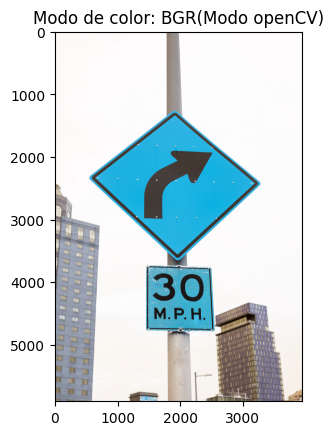

In [3]:
#Tomo y "leo" la imagen elegida desde el drive.  Decido continuar con la de la ceñal de tránsito con la ciudad de fondo.
city1 = imread('Señal_Ciudad.jpg')  ### Ojo!  Es sensible de Mayúsculas y Minúsculas (colab corre en un entorno unix)

#La mostramos con los colores invertidos porque plt utiliza RGB y cv2 BGR
plt.title("Modo de color: BGR(Modo openCV)")
plt.imshow(city1)
plt.show()


In [4]:
# A partir de los análisis efectuados en el "Pre-Procesamiento".  Continuamos.

# Obtengo las dimensiones de la imagen en variables separadas.

Alto1, Ancho1, Canales1 = city1.shape
print("Alto = ", Alto1)
print("Ancho = ", Ancho1)
print("Canales = ", Canales1)

Alto =  5899
Ancho =  3938
Canales =  3


Definición:  El muestreo espacial reduce la resolución de una imagen tomando píxeles a intervalos regulares.

In [18]:
d = 16   # Factor de muestreo: toma 1 pixel cada 'd' pixeles
ix = range(0,Alto1,d)         # Crea secuencia de 0 a Nx saltando de d en d
jx = range(0,Ancho1,d)         # Igual para columnas
Alto2 = len(ix)               # Nueva altura = número de filas a tomar
Ancho2 = len(jx)               # Nueva anchura = número de columnas a tomar

In [19]:
# Crea nueva imagen muestreada
city_v2 = np.zeros((Alto2,Ancho2,3), np.uint8)  # Matriz vacía de enteros 0-255
for i in range(Alto2):              # Para cada fila
    for j in range(Ancho2):          # Para cada columna
        city_v2[i,j] = city1[ix[i],jx[j]]  # Copia el pixel correspondiente

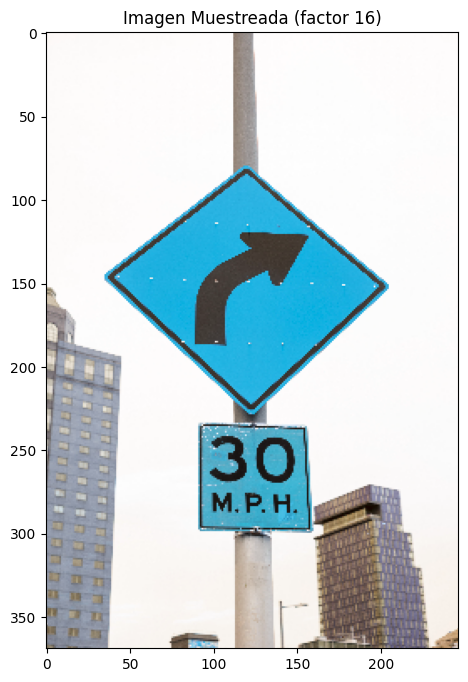

Resolución reducida de 5899x3938 a 369x247 pixels
Tamaño =  (369, 247, 3)
Max  =  255
Min  =  0
Promedio =  207.75466391640975


In [20]:
# Muestra imagen muestreada
plt.figure(figsize=(8,8))
plt.imshow(city_v2, cmap='gray')
plt.title(f'Imagen Muestreada (factor {d})')
plt.show()
print(f'Resolución reducida de {Alto1}x{Ancho1} a {Alto2}x{Ancho2} pixels')

print('Tamaño = ',city_v2.shape)
print('Max  = ',np.max(city_v2))
print('Min  = ',np.min(city_v2))
print('Promedio = ', np.mean(city_v2))

Según el factor de muestreo, la imagen se va a ver más pixelada, dado que lo que estamos haciendo es reducir su resolución.

Observaciones brindades por Gemini al respecto de un downsampling tan agresivo como el aplicado (Factor 16)

Beneficios del downsampling en general:  
* Reducción de la cantidad de datos: El beneficio más directo es la disminución significativa del número de píxeles en la imagen. Esto conlleva una reducción en la cantidad de memoria requerida para almacenar la imagen y una disminución en el tiempo de procesamiento para las etapas posteriores (cuantización, segmentación, reconocimiento, etc.).

* Reducción de la redundancia espacial: Las imágenes a menudo contienen información espacial redundante, donde píxeles vecinos tienen valores muy similares. El downsampling ayuda a eliminar esta redundancia, reteniendo la información más esencial a una escala más gruesa.

* Aumento de la robustez a pequeños detalles y ruido: Al reducir la resolución, se pueden suavizar o eliminar pequeños detalles o ruido de alta frecuencia que podrían no ser relevantes para la tarea principal. Esto puede hacer que las etapas posteriores sean más robustas.

* Enfoque en las características a gran escala: El downsampling enfatiza las estructuras y formas más grandes en la imagen, lo que puede ser beneficioso si la información importante reside en estas características a gran escala (por ejemplo, la forma general de la señal de tráfico).

Beneficios del downsampling agresivo:

* Versión de baja resolución de la imagen: Tendrás una representación de tu imagen original con mucho menos detalle espacial. Podrás observar las formas y estructuras principales, pero los detalles finos se habrán perdido.

* Evaluación de la información esencial: Al observar la imagen downsampleada, puedes evaluar si la información crucial para tu tarea aún es discernible. Si lo es, el factor de downsampling podría ser aceptable. Si la información importante se pierde, quizás necesites un factor menor.

* Impacto en el ruido y los detalles: Podrás ver cómo el downsampling ha afectado el ruido y los pequeños detalles de la imagen. Si el ruido era significativo, debería haberse reducido. Los bordes y las líneas finas se verán más borrosos o podrían desaparecer.


Consideraciones a tener en cuenta cuando se hace tan agresivamente:

* Pérdida de detalles finos: Un factor de 16 implica una pérdida considerable de detalle.

* Posible aliasing: Si el método de downsampling no se realizó con un filtro anti-aliasing adecuado, podrían aparecer artefactos visuales (como patrones irregulares o "escaleras" en los bordes rectos).